In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# People

#     ID: Customer's unique identifier
#     Year_Birth: Customer's birth year
#     Education: Customer's education level
#     Marital_Status: Customer's marital status
#     Income: Customer's yearly household income
#     Kidhome: Number of children in customer's household
#     Teenhome: Number of teenagers in customer's household
#     Dt_Customer: Date of customer's enrollment with the company
#     Recency: Number of days since customer's last purchase
#     Complain: 1 if the customer complained in the last 2 years, 0 otherwise

# Products

#     Wines: Amount spent on wine in last 2 years
#     Fruits: Amount spent on fruits in last 2 years
#     Meat: Amount spent on meat in last 2 years
#     Fish: Amount spent on fish in last 2 years
#     Sweet : Amount spent on sweets in last 2 years
#     Gold: Amount spent on gold in last 2 years

# Promotion
#     NumDealsPurchases: Number of purchases made with a discount

# Place
#     NumWebPurchases: Number of purchases made through the company’s website
#     NumCatalogPurchases: Number of purchases made using a catalogue
#     NumStorePurchases: Number of purchases made directly in stores

#     NumWebVisitsMonth: Number of visits to company’s website in the last month



In [81]:
df = pd.read_csv('cust_purchase.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5


In [82]:
df.shape

(2240, 20)

#### Data Preprocessing

#### 1) Handling Null

In [83]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
Wines                   0
Fruits                  0
Meat                    0
Fish                    0
Sweets                  0
Gold                    0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
dtype: int64

In [84]:
df.dropna(inplace=True)
df.shape

(2216, 20)

#### 2) Handling Duplicates

In [85]:
df.duplicated().sum()

0

In [86]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
Wines                    int64
Fruits                   int64
Meat                     int64
Fish                     int64
Sweets                   int64
Gold                     int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
dtype: object

In [87]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])  
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
Wines                           int64
Fruits                          int64
Meat                            int64
Fish                            int64
Sweets                          int64
Gold                            int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
dtype: object

In [88]:
df['Dt_Customer'].max()

Timestamp('2014-12-06 00:00:00')

#### Feature Engineering

In [89]:
df['Customer_since(days)'] = (df['Dt_Customer'].max() - df['Dt_Customer']).dt.days
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_since(days)
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,546,172,88,88,3,8,10,4,7,971
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,6,2,1,6,2,1,1,2,5,125
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,127,111,21,42,1,8,2,10,4,472
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,20,10,3,5,2,2,0,4,6,65
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,118,46,27,15,5,5,3,6,5,321


In [90]:
df['Age'] = 2014  - df['Year_Birth']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_since(days),Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,172,88,88,3,8,10,4,7,971,57
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,2,1,6,2,1,1,2,5,125,60
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,111,21,42,1,8,2,10,4,472,49
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,10,3,5,2,2,0,4,6,65,30
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,46,27,15,5,5,3,6,5,321,33


In [91]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Customer_since(days)', 'Age'],
      dtype='object')

In [92]:
df['Spent'] = df['Wines'] + df['Fruits'] + df['Meat'] + df['Fish'] + df['Sweets'] + df['Gold']
df['Children'] = df['Kidhome'] + df['Teenhome']
df['IsParent'] = np.where(df['Children']>=1,1,0)

In [93]:
cat_cols = df.dtypes[df.dtypes=='object'].index
cat_cols

Index(['Education', 'Marital_Status'], dtype='object')

In [94]:
for i in cat_cols:
    print(i,df[i].unique())

Education ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital_Status ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [95]:
df['Marital_Status'] = df['Marital_Status'].replace({'Single':'Alone','Together':'Partner',
                                                    'Married':'Partner','Divorced':'Alone',
                                                    'Widow':'Alone','Absurd':'Alone',
                                                    'YOLO':'Alone'})

In [96]:
df['Marital_Status'].value_counts()

Partner    1430
Alone       786
Name: Marital_Status, dtype: int64

In [97]:
df['Education'] = df['Education'].replace({'Graduation':'Grad','Basic':'UnderGrad',
                                          'Master':'PostGrad','PhD':'PostGrad',
                                          '2n Cycle':'PostGrad'})

In [98]:
df['Education'].value_counts()

Grad         1116
PostGrad     1046
UnderGrad      54
Name: Education, dtype: int64

In [99]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Customer_since(days)', 'Age', 'Spent', 'Children', 'IsParent'],
      dtype='object')

In [100]:
df['Family_Size'] = df['Marital_Status'].replace({'Alone':1,'Partner':2}) + df['Children']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_since(days),Age,Spent,Children,IsParent,Family_Size
0,5524,1957,Grad,Alone,58138.0,0,0,2012-04-09,58,635,...,8,10,4,7,971,57,1617,0,0,1
1,2174,1954,Grad,Alone,46344.0,1,1,2014-08-03,38,11,...,1,1,2,5,125,60,27,2,1,3
2,4141,1965,Grad,Partner,71613.0,0,0,2013-08-21,26,426,...,8,2,10,4,472,49,776,0,0,2
3,6182,1984,Grad,Partner,26646.0,1,0,2014-10-02,26,11,...,2,0,4,6,65,30,53,1,1,3
4,5324,1981,PostGrad,Partner,58293.0,1,0,2014-01-19,94,173,...,5,3,6,5,321,33,422,1,1,3


In [101]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Customer_since(days)', 'Age', 'Spent', 'Children', 'IsParent',
       'Family_Size'],
      dtype='object')

In [102]:
df['Dt_Year'] = df['Dt_Customer'].dt.year
df['Dt_Month'] = df['Dt_Customer'].dt.month

In [103]:
df['Total_Purchase'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

In [104]:
cols_drop = ['Year_Birth','Dt_Customer']
df.drop(cols_drop,axis=1,inplace=True)
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Customer_since(days)', 'Age',
       'Spent', 'Children', 'IsParent', 'Family_Size', 'Dt_Year', 'Dt_Month',
       'Total_Purchase'],
      dtype='object')

In [105]:
print(df.shape)

(2216, 27)


In [106]:
df1 = df.copy()

#### EDA

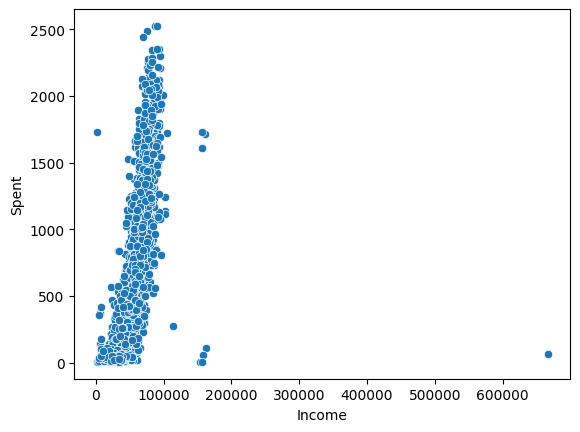

In [107]:
sns.scatterplot(x=df['Income'],y=df['Spent'])
plt.show()

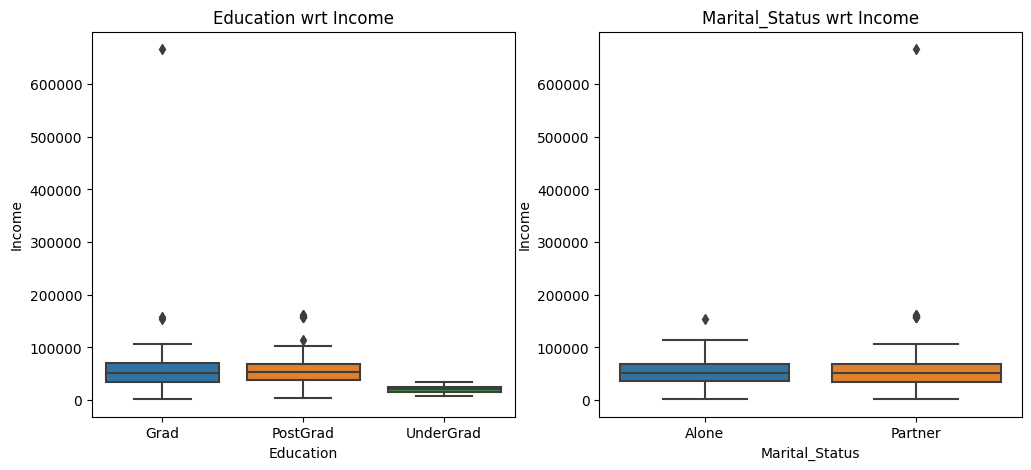

In [108]:
cols = ['Education', 'Marital_Status']
plt.figure(figsize=(12,5))
for i in range(len(cols)):
    plt.subplot(1,2,i+1)
    sns.boxplot(x=df[cols[i]],y=df['Income'])
    plt.title(f'{cols[i]} wrt Income')
plt.show()

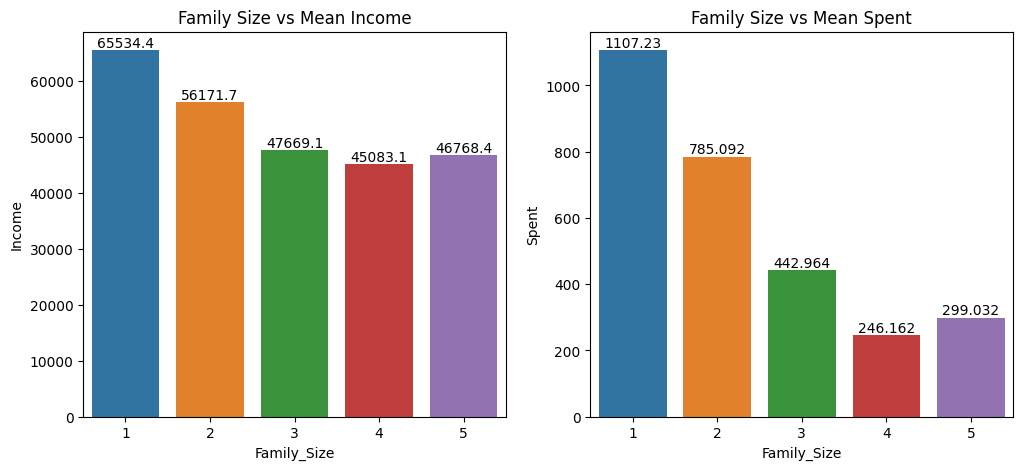

In [109]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
ax1 = sns.barplot(x=df['Family_Size'],y=df['Income'],ci=None)
plt.title('Family Size vs Mean Income')
ax1.bar_label(ax1.containers[0])
plt.subplot(1,2,2)
ax2 = sns.barplot(x=df['Family_Size'],y=df['Spent'],ci=None)
ax2.bar_label(ax2.containers[0])
plt.title('Family Size vs Mean Spent')
plt.show()

In [110]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Customer_since(days)', 'Age',
       'Spent', 'Children', 'IsParent', 'Family_Size', 'Dt_Year', 'Dt_Month',
       'Total_Purchase'],
      dtype='object')

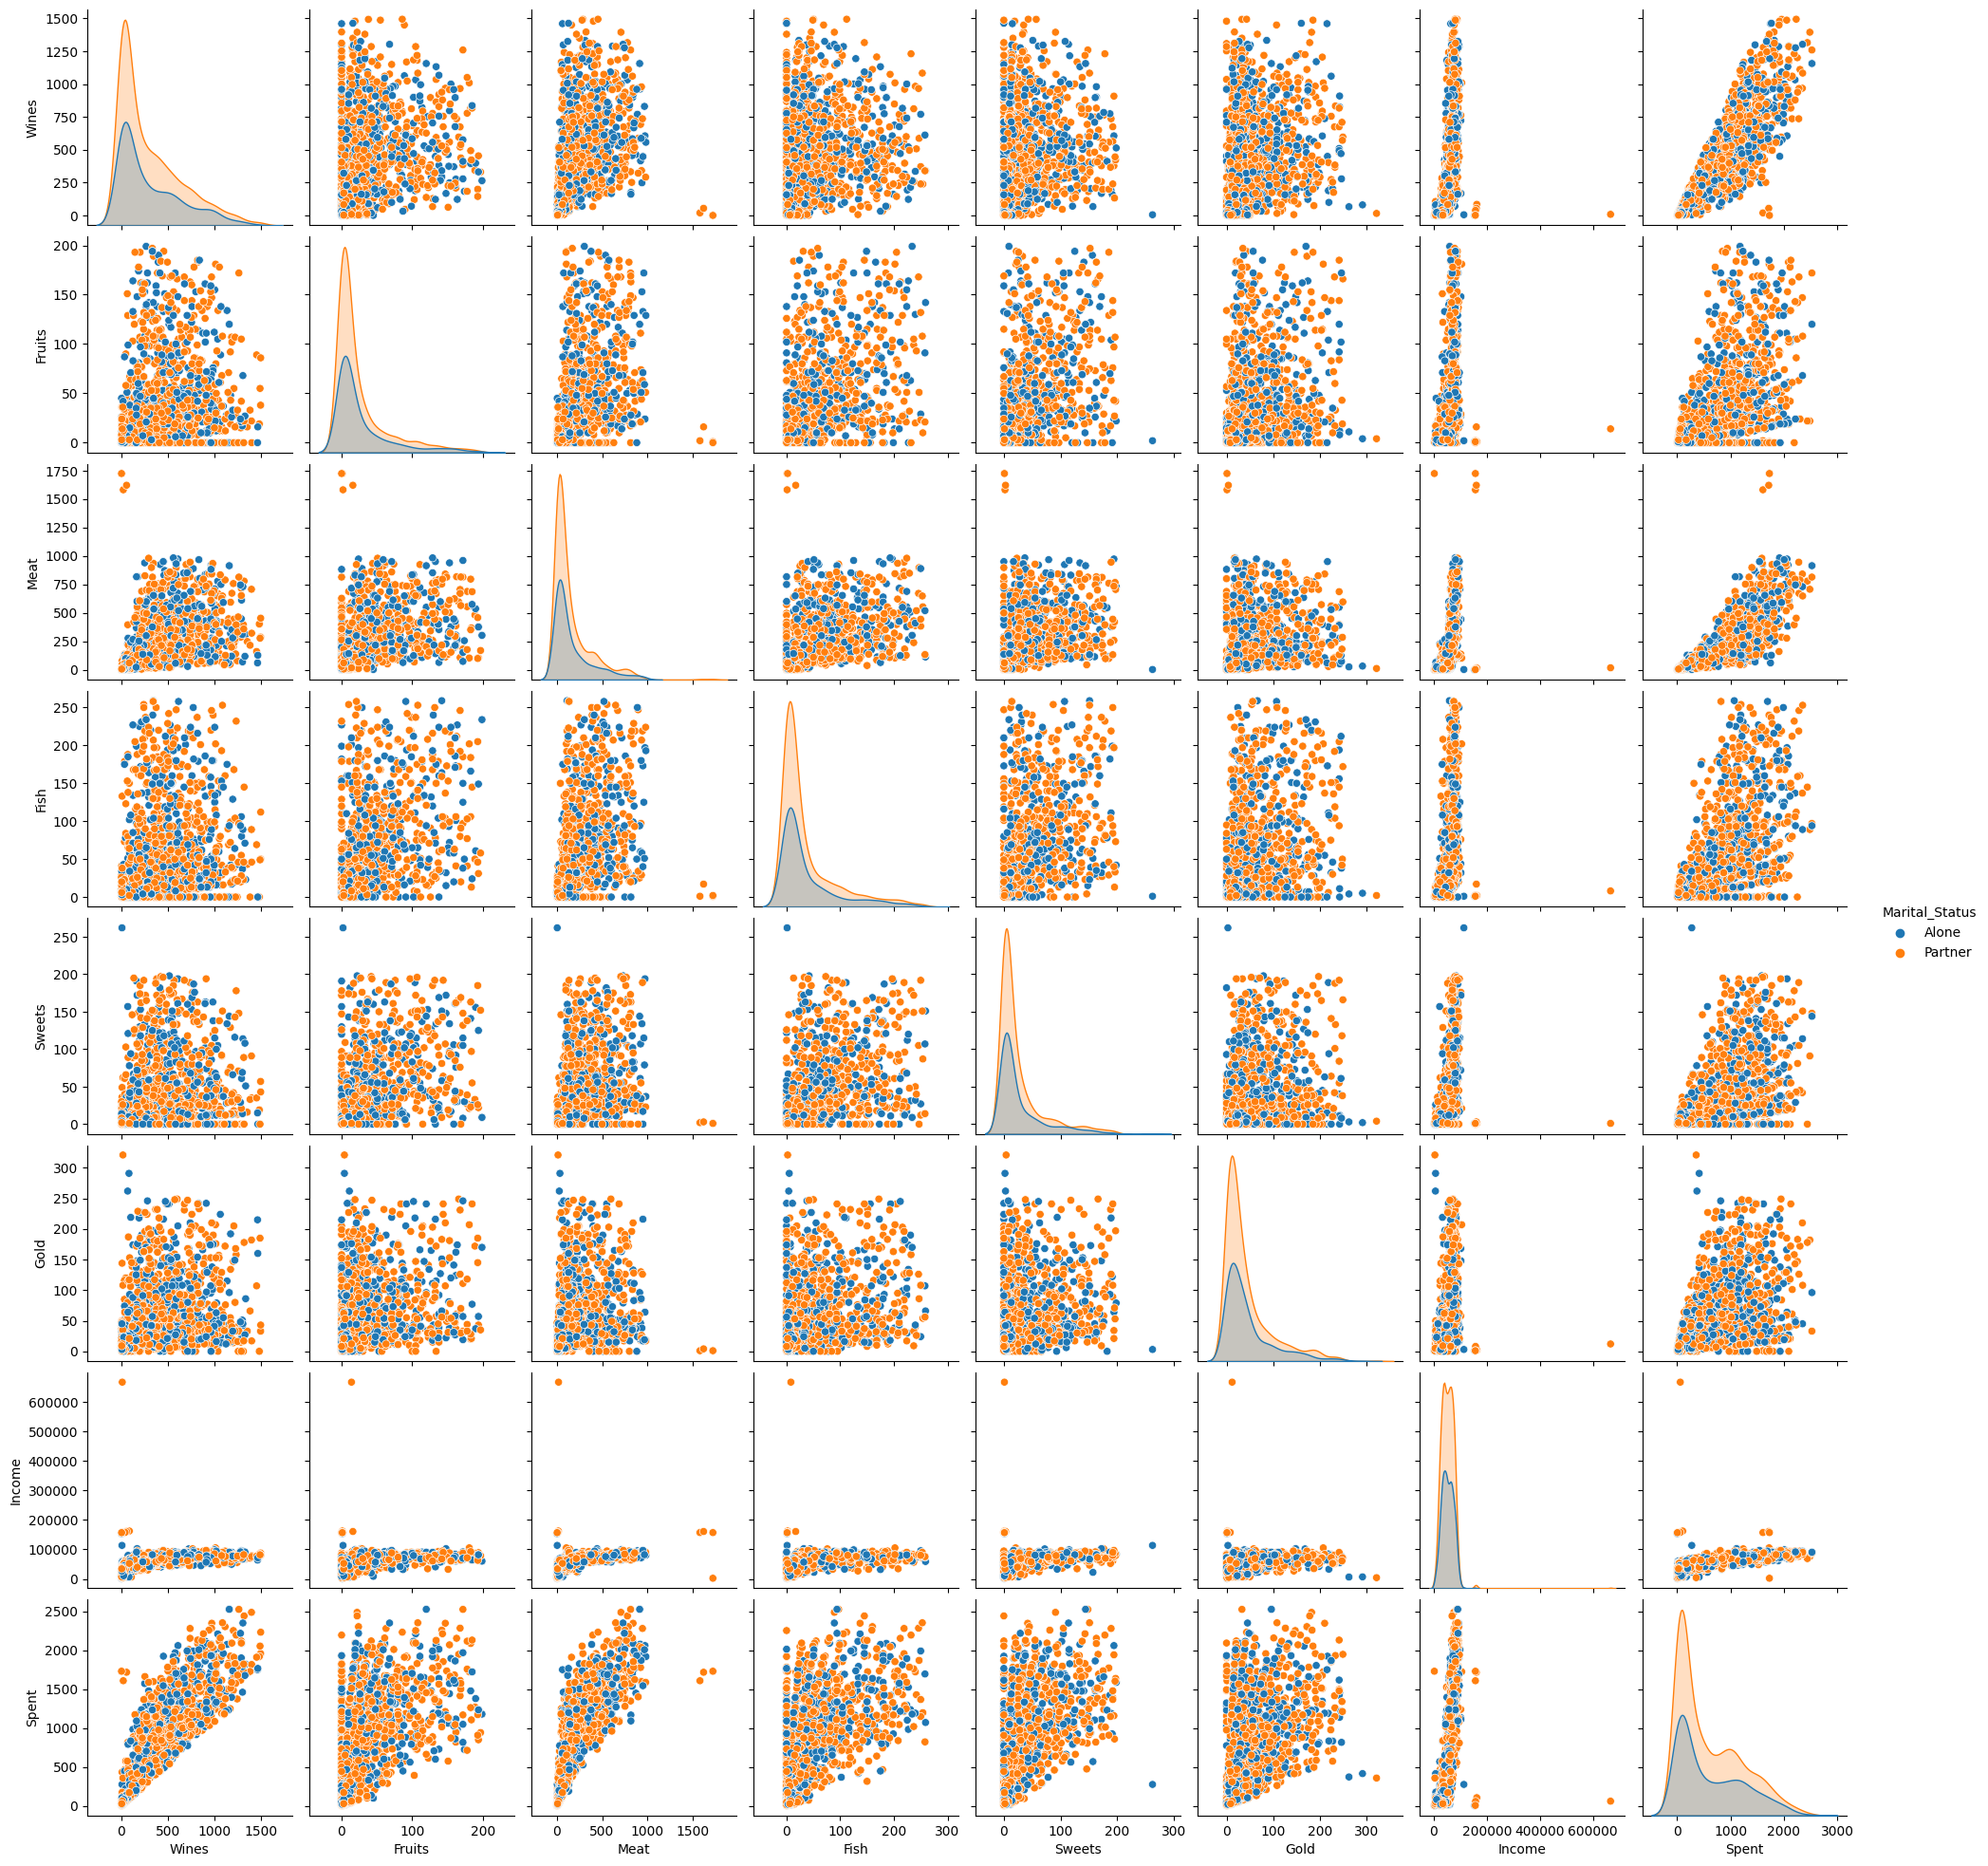

In [50]:
cols = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold','Income', 'Spent']
sns.pairplot(data=df,vars=cols,hue='Marital_Status')
plt.show()

In [111]:
df.describe()

,ID,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumWebVisitsMonth,Customer_since(days),Age,Spent,Children,IsParent,Family_Size,Dt_Year,Dt_Month,Total_Purchase
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,...,5.319043,512.006318,45.179603,607.075361,0.947202,0.714350,2.592509,2013.028430,6.517148,12.557310
std,3249.376275,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,...,2.425359,232.469034,11.985554,602.900476,0.749062,0.451825,0.905722,0.685618,3.509764,7.204611
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,18.000000,5.000000,0.000000,0.000000,1.000000,2012.000000,1.000000,0.000000
25%,2814.750000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,3.000000,340.000000,37.000000,69.000000,0.000000,0.000000,2.000000,2013.000000,3.000000,6.000000
50%,5458.500000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,...,6.000000,513.000000,44.000000,396.500000,1.000000,1.000000,3.000000,2013.000000,6.000000,12.000000
75%,8421.750000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,...,7.000000,686.000000,55.000000,1048.000000,1.000000,1.000000,3.000000,2013.000000,10.000000,18.000000
max,11191.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,20.000000,1063.000000,121.000000,2525.000000,3.000000,1.000000,5.000000,2014.000000,12.000000,32.000000


In [112]:
print(df[df['Age']>90].shape)
print(df.shape)

(3, 27)
(2216, 27)


In [114]:
df = df[df['Age']<=90]

In [115]:
df.shape

(2213, 27)

#### Outlier Treatment

In [117]:
a = df.describe(percentiles=[0.01,0.02,0.05,0.97,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,2%,5%,50%,97%,98%,99%,max
ID,0.0,123.24,234.48,572.0,5455.0,10851.12,10962.60,11074.88,11191.0
Income,1730.0,7563.36,14243.92,18984.0,51373.0,87737.88,90746.28,94461.44,666666.0
Kidhome,0.0,0.00,0.00,0.0,0.0,1.00,2.00,2.00,2.0
Teenhome,0.0,0.00,0.00,0.0,0.0,1.00,2.00,2.00,2.0
Recency,0.0,0.00,1.00,4.0,49.0,96.00,97.00,98.00,99.0
Wines,0.0,1.00,1.00,3.0,175.0,1108.12,1190.84,1285.00,1493.0
Fruits,0.0,0.00,0.00,0.0,8.0,142.00,159.00,172.00,199.0
Meat,0.0,2.00,2.24,4.0,68.0,779.64,830.80,914.76,1725.0
Fish,0.0,0.00,0.00,0.0,12.0,195.92,210.00,226.76,259.0
Sweets,0.0,0.00,0.00,0.0,8.0,147.64,161.00,176.00,262.0


In [119]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Customer_since(days)', 'Age',
       'Spent', 'Children', 'IsParent', 'Family_Size', 'Dt_Year', 'Dt_Month',
       'Total_Purchase'],
      dtype='object')

In [126]:
print(df[df['Income']<7563].shape)
print(df[df['Spent']<13].shape)

(23, 27)
(21, 27)


In [121]:
cols = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth']
for i in cols:
    print(i,df[i].nunique())

NumDealsPurchases 15
NumWebPurchases 15
NumCatalogPurchases 14
NumStorePurchases 14
NumWebVisitsMonth 16


In [123]:
df1 = df.copy()

In [122]:
right_sk_cols = ['Income','Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold','Spent']

def ot_right_skewed(x):
    x = x.clip(upper=x.quantile(0.99))
    return x

In [127]:
df[right_sk_cols] = df[right_sk_cols].apply(ot_right_skewed)

In [128]:
df['Income'] = np.where(df['Income']<7563.36,7563.36,df['Income'])
df['Spent'] = np.where(df['Spent']<13,13,df['Spent'])

In [129]:
a = df.describe(percentiles=[0.01,0.02,0.05,0.97,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,2%,5%,50%,97%,98%,99%,max
ID,0.00,123.2400,234.48,572.0,5455.0,10851.12,10962.60,11074.8800,11191.00
Income,7563.36,7619.1168,14243.92,18984.0,51373.0,87737.88,90746.28,94452.1472,94461.44
Kidhome,0.00,0.0000,0.00,0.0,0.0,1.00,2.00,2.0000,2.00
Teenhome,0.00,0.0000,0.00,0.0,0.0,1.00,2.00,2.0000,2.00
Recency,0.00,0.0000,1.00,4.0,49.0,96.00,97.00,98.0000,99.00
Wines,0.00,1.0000,1.00,3.0,175.0,1108.12,1190.84,1285.0000,1285.00
Fruits,0.00,0.0000,0.00,0.0,8.0,142.00,159.00,172.0000,172.00
Meat,0.00,2.0000,2.24,4.0,68.0,779.64,830.80,914.5488,914.76
Fish,0.00,0.0000,0.00,0.0,12.0,195.92,210.00,226.5488,226.76
Sweets,0.00,0.0000,0.00,0.0,8.0,147.64,161.00,176.0000,176.00


In [130]:
cat_cols = df.dtypes[df.dtypes=='object'].index
cat_cols

Index(['Education', 'Marital_Status'], dtype='object')

In [132]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [133]:
lb = LabelEncoder()
for i in cat_cols:
    df[i] = lb.fit_transform(df[i])

In [134]:
df.dtypes.value_counts()

int64      21
int32       3
float64     3
dtype: int64

In [135]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Customer_since(days)', 'Age',
       'Spent', 'Children', 'IsParent', 'Family_Size', 'Dt_Year', 'Dt_Month',
       'Total_Purchase'],
      dtype='object')

In [136]:
x = df.drop(['ID','Dt_Year', 'Dt_Month'],axis=1)
print(x.shape)

(2213, 24)


In [137]:
x1 = x.copy()
x2 = x.copy()

#### Standardization

In [138]:
x.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_since(days),Age,Spent,Children,IsParent,Family_Size,Total_Purchase
0,0,0,58138.0,0,0,58,635,88,546.0,172.0,...,10,4,7,971,57,1617,0,0,1,22
1,0,0,46344.0,1,1,38,11,1,6.0,2.0,...,1,2,5,125,60,27,2,1,3,4
2,0,1,71613.0,0,0,26,426,49,127.0,111.0,...,2,10,4,472,49,776,0,0,2,20
3,0,1,26646.0,1,0,26,11,4,20.0,10.0,...,0,4,6,65,30,53,1,1,3,6
4,1,1,58293.0,1,0,94,173,43,118.0,46.0,...,3,6,5,321,33,422,1,1,3,14


In [141]:
x.describe()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_since(days),Age,Spent,Children,IsParent,Family_Size,Total_Purchase
count,2213.000000,2213.00000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,...,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000
mean,0.520108,0.64573,51758.823498,0.441934,0.505648,49.007682,304.109354,26.178491,165.368043,37.464745,...,2.671487,5.805242,5.321735,512.214641,45.082693,605.270673,0.947582,0.714415,2.593312,12.564392
std,0.546382,0.47840,20728.897212,0.536965,0.544236,28.941864,334.000833,39.163348,216.465844,54.133891,...,2.927096,3.250752,2.425092,232.522498,11.700216,597.537886,0.749297,0.451795,0.906073,7.204770
min,0.000000,0.00000,7563.360000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,18.000000,13.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.00000,35246.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,340.000000,37.000000,69.000000,0.000000,0.000000,2.000000,6.000000
50%,0.000000,1.00000,51373.000000,0.000000,0.000000,49.000000,175.000000,8.000000,68.000000,12.000000,...,2.000000,5.000000,6.000000,513.000000,44.000000,397.000000,1.000000,1.000000,3.000000,12.000000
75%,1.000000,1.00000,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,686.000000,55.000000,1048.000000,1.000000,1.000000,3.000000,18.000000
max,2.000000,1.00000,94461.440000,2.000000,2.000000,99.000000,1285.000000,172.000000,914.760000,226.760000,...,28.000000,13.000000,20.000000,1063.000000,74.000000,2126.000000,3.000000,1.000000,5.000000,32.000000


In [140]:
x.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Customer_since(days)', 'Age',
       'Spent', 'Children', 'IsParent', 'Family_Size', 'Total_Purchase'],
      dtype='object')

In [143]:
cols_to_scale = ['Income','Recency','Wines','Fruits','Meat','Fish','Sweets','Gold',
                'Customer_since(days)','Age','Spent','Total_Purchase']

sc = StandardScaler()
x[cols_to_scale] = sc.fit_transform(x[cols_to_scale])

In [144]:
x.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_since(days),Age,Spent,Children,IsParent,Family_Size,Total_Purchase
0,0,0,0.307813,0,0,0.310773,0.990912,1.578912,1.758790,2.485793,...,10,4,7,1.973525,1.018785,1.693546,0,0,1,1.309929
1,0,0,-0.261280,1,1,-0.380424,-0.877769,-0.643055,-0.736394,-0.655278,...,1,2,5,-1.665655,1.275248,-0.967974,2,1,3,-1.188980
2,0,1,0.958018,0,0,-0.795142,0.365024,0.582858,-0.177288,1.358703,...,2,10,4,-0.172989,0.334882,0.285786,0,0,2,1.032273
3,0,1,-1.211762,1,0,-0.795142,-0.877769,-0.566435,-0.671704,-0.507463,...,0,4,6,-1.923752,-1.289387,-0.924453,1,1,3,-0.911323
4,1,1,0.315292,1,0,1.554927,-0.392631,0.429619,-0.218874,0.157705,...,3,6,5,-0.822535,-1.032923,-0.306779,1,1,3,0.199303


#### Elbow Method

In [145]:
from sklearn.cluster import KMeans

In [146]:
wcss = []
for i in range(1,15):
    model = KMeans(n_clusters=i)
    model.fit(x)
    wcss.append(model.inertia_)    
print('WCSS\n',wcss)

WCSS
 [112679.88160867593, 69519.85458898116, 58497.114610745484, 53612.63906901543, 50384.44945194907, 47502.968131792346, 45421.69280673221, 43528.09210938262, 41463.40801800904, 39887.70356432525, 38864.476700728475, 37932.763624960586, 37170.33257363636, 36242.70916025684]


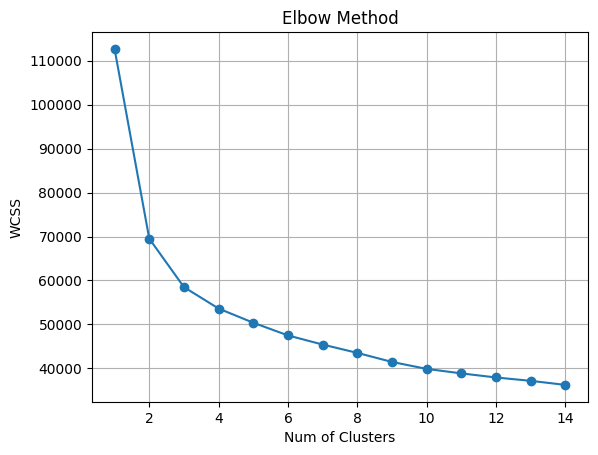

In [148]:
plt.plot(list(range(1,15)),wcss,marker='o')
plt.xlabel('Num of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.grid()
plt.show()

#### Silhouette Score

#### Inference
Optimal Number of Clusters = 3,4 or 5

In [149]:
from collections import Counter

In [159]:
def K_cluster_profiling(k,sc_data,org_data):
    model = KMeans(n_clusters=k,random_state=0)
    model.fit(sc_data)
    ypred = model.predict(sc_data)
    print(Counter(ypred))
    cent = model.cluster_centers_
    org_data[f'Cls{k}'] = ypred
    r1 = org_data.drop(f'Cls{k}',axis=1).mean().reset_index().T
    r1.columns = r1.loc['index']
    r1 = r1.iloc[1:,]
    r1.index = ['Mean']
    r2 = org_data.groupby(f'Cls{k}').mean()
    cls_profiling = pd.concat([r1,r2])
    return cls_profiling.T, ypred

In [157]:
c3_profile, ypred_k3 = K_cluster_profiling(3,x,x1)

Counter({1: 1039, 0: 595, 2: 579})


In [158]:
c3_profile

,Mean,0,1,2
Education,0.520108,0.517647,0.558229,0.454231
Marital_Status,0.64573,0.658824,0.649663,0.625216
Income,51758.823498,58473.237983,35052.269875,74838.327116
Kidhome,0.441934,0.289076,0.765159,0.018998
Teenhome,0.505648,0.835294,0.470645,0.229706
Recency,49.007682,47.532773,49.196343,50.184801
Wines,304.109354,482.719328,45.113571,585.324698
Fruits,26.178491,28.721008,4.810395,61.91019
Meat,165.368043,156.184874,22.287777,431.558687
Fish,37.464745,36.455529,7.256015,92.710604


In [160]:
c4_profile, ypred_k4 = K_cluster_profiling(4,x,x2)

Counter({0: 975, 3: 483, 2: 381, 1: 374})


In [161]:
c4_profile

,Mean,0,1,2,3
Education,0.520108,0.566154,0.483957,0.446194,0.513458
Marital_Status,0.64573,0.647179,0.673797,0.603675,0.654244
Income,51758.823498,34394.462974,70080.421818,74980.476745,54306.491925
Kidhome,0.441934,0.772308,0.088235,0.015748,0.385093
Teenhome,0.505648,0.457436,0.524064,0.167979,0.855072
Recency,49.007682,49.148718,48.679144,50.251969,47.995859
Wines,304.109354,37.110769,610.745989,571.774278,394.505176
Fruits,26.178491,4.633846,52.973262,65.427822,17.960663
Meat,165.368043,19.762051,309.984064,454.022152,119.616977
Fish,37.464745,6.321026,75.081176,93.522625,26.985507


In [162]:
c5_profile, ypred_k5 = K_cluster_profiling(5,x,x2)
c5_profile

Counter({2: 949, 1: 369, 4: 337, 3: 282, 0: 276})


,Mean,0,1,2,3,4
Education,0.520108,0.423913,0.482385,0.574289,0.51773,0.489614
Marital_Status,0.64573,0.637681,0.680217,0.646997,0.648936,0.608309
Income,51758.823498,74128.327681,50573.88,34266.785753,64084.104965,73680.115608
Kidhome,0.441934,0.018116,0.525745,0.772392,0.131206,0.026706
Teenhome,0.505648,0.202899,0.840108,0.455216,0.751773,0.323442
Recency,49.007682,48.485507,48.382114,48.955743,47.957447,51.145401
Wines,304.109354,558.326087,310.579946,34.179136,632.737589,573.958457
Fruits,26.178491,64.221014,14.601626,4.477345,41.301418,56.154303
Meat,165.368043,436.427101,99.425474,18.963119,209.680851,390.776261
Fish,37.464745,90.691449,23.401084,6.179136,52.008227,85.20273
